In [2]:
import tensorflow as tf 
import sklearn 
import numpy as np 
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
import cv2

In [3]:
from tensorflow.keras.utils import img_to_array

In [4]:
base_dir='./cifar10/train'

In [5]:
labels=os.listdir(base_dir)
labels=sorted(labels)
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
IMAGE_SIZE=32
BATCH_SIZE=32

#pre-processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1,
    featurewise_std_normalization=True,
)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

/home/shahgnp/.local/lib/python3.10/site-packages/keras/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 45000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


In [7]:
batch=next(train_datagen)

/home/shahgnp/.local/lib/python3.10/site-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/home/shahgnp/.local/lib/python3.10/site-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [8]:
print(batch)

(array([[[[172.31145  , 201.10382  , 216.51907  ],
         [172.31145  , 201.10382  , 216.51907  ],
         [174.33646  , 202.32834  , 215.64331  ],
         ...,
         [178.13872  , 195.89938  , 213.22925  ],
         [167.9725   , 187.07631  , 206.38776  ],
         [167.9725   , 187.07631  , 206.38776  ]],

        [[168.9046   , 200.22615  , 214.4523   ],
         [168.9046   , 200.22615  , 214.4523   ],
         [171.63081  , 201.11192  , 213.7299   ],
         ...,
         [179.56226  , 197.22075  , 211.63882  ],
         [179.92929  , 197.38159  , 211.7385   ],
         [179.92929  , 197.38159  , 211.7385   ]],

        [[167.34848  , 200.       , 215.95454  ],
         [167.34848  , 200.       , 215.95454  ],
         [169.28922  , 200.25076  , 214.76611  ],
         ...,
         [189.06935  , 206.24954  , 219.01015  ],
         [193.77274  , 209.4697   , 221.16667  ],
         [193.77274  , 209.4697   , 221.16667  ]],

        ...,

        [[ 77.954544 , 105.909096 , 1

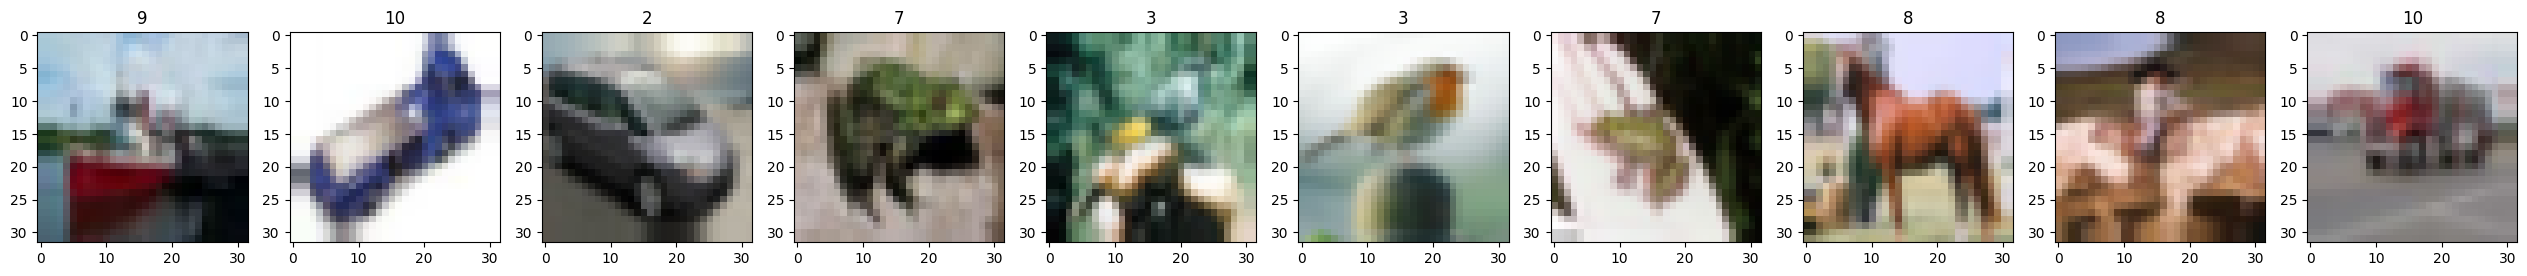

In [9]:
fig, ax = plt.subplots(ncols=10, figsize=(32,32))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(np.argmax(batch[1][idx])+1)

In [10]:
checkpoint_path = "./cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [11]:
os.listdir(checkpoint_dir)

['fromInternet',
 'model_save_at_3.h5',
 'model_save_at_1.h5',
 'model.h5',
 'checkpoint',
 'README.md',
 'cp.ckpt.data-00000-of-00001',
 '.gitignore',
 'cp.ckpt.index',
 'model_save_at_4.h5',
 'multiclassimageclassifier.ipynb',
 'cifar10',
 '.ipynb_checkpoints',
 'model_save_at_5.h5',
 '.git',
 'requirements.txt',
 'model_save_at_2.h5']

# Define Model

In [12]:
def create_cnn_model():  
    
    #model1
    
#   cnn=tf.keras.Sequential()
#   cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(32,32,3)))
#   cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=1))

#   cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu'))
#   cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=1))

#   cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
#   cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#   cnn.add(tf.keras.layers.Flatten())
#   cnn.add(tf.keras.layers.Dense(64,activation='relu'))
#   cnn.add(tf.keras.layers.Dense(32,activation='relu'))
#   cnn.add(tf.keras.layers.Dense(32,activation='relu'))
#   cnn.add(tf.keras.layers.Dense(10,activation='softmax'))

#   cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model2

#     model=tf.keras.models.Sequential() #if imported from tensorflow.keras import models we would write models.Sequential
    
#     model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
#     model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))

#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))


#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(64,activation='relu'))
#     model.add(tf.keras.layers.Dense(128,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))

#     model.add(tf.keras.layers.Dense(256,activation='relu'))
#     model.add(tf.keras.layers.Dense(256,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))

#     model.add(tf.keras.layers.Dense(128,activation='relu'))
#     model.add(tf.keras.layers.Dense(64,activation='relu'))
#     model.add(tf.keras.layers.Dense(10,activation='softmax'))

    #model3

    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(32,32,3)))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    
    model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    
    model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024,activation='relu'))
    model.add(tf.keras.layers.Dense(2048,activation='relu'))
    model.add(tf.keras.layers.Dense(1024,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))



    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

def plot_metrics_for_training(history):
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    plt.subplot(222)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([0.01, 1])
    plt.legend(loc='lower right')

In [59]:
CNN_model=create_cnn_model()
CNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_42 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_43 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                      

# Train Model

In [60]:
history_for_plotting=CNN_model.fit(train_datagen,epochs=25,validation_data=test_datagen,callbacks=[cp_callback])

Epoch 1/25
1407/1407 [==============================] - ETA: 0s - loss: 1.6807 - accuracy: 0.4056
Epoch 1: saving model to ./cp.ckpt
1407/1407 [==============================] - 26s 16ms/step - loss: 1.6807 - accuracy: 0.4056 - val_loss: 1.7738 - val_accuracy: 0.4558
Epoch 2/25
1405/1407 [============================>.] - ETA: 0s - loss: 1.2237 - accuracy: 0.5916
Epoch 2: saving model to ./cp.ckpt
1407/1407 [==============================] - 22s 16ms/step - loss: 1.2233 - accuracy: 0.5918 - val_loss: 1.0951 - val_accuracy: 0.6224
Epoch 3/25
1407/1407 [==============================] - ETA: 0s - loss: 1.0154 - accuracy: 0.6658
Epoch 3: saving model to ./cp.ckpt
1407/1407 [==============================] - 22s 16ms/step - loss: 1.0154 - accuracy: 0.6658 - val_loss: 0.9719 - val_accuracy: 0.6810
Epoch 4/25
1406/1407 [============================>.] - ETA: 0s - loss: 0.8747 - accuracy: 0.7165
Epoch 4: saving model to ./cp.ckpt
1407/1407 [==============================] - 22s 16ms/step - lo

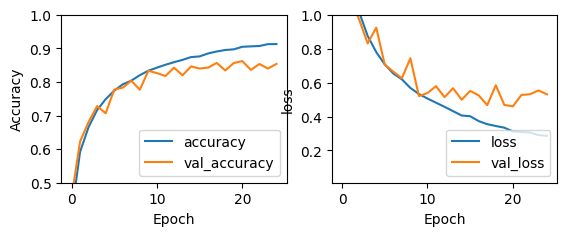

In [61]:
plot_metrics_for_training(history_for_plotting)

# Save Model

In [62]:
CNN_model.save_weights('./model.h5')

# Load saved Model

In [14]:
Loaded_model=create_cnn_model()
Loaded_model.load_weights('./model.h5')

In [15]:
Loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

# Evaluate Model

In [17]:
print(Loaded_model.evaluate(test_datagen))

157/157 [==============================] - 1s 5ms/step - loss: 0.5306 - accuracy: 0.8538
[0.5305982828140259, 0.8537999987602234]


In [18]:
import cv2

In [19]:
label_path='./cifar10/test/'
labels=sorted(os.listdir(label_path))
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [46]:
# #pre=processing
# train_datagen_2=tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255
#     )

# train_datagen_2=train_datagen_2.flow_from_directory(
#     './cifar10/test',
#     target_size=(32,32),
#     batch_size=1,
#     subset='training'
# )

In [47]:
# batch2=next(train_datagen_2)

In [48]:
# train_datagen_2

In [49]:
# batch2

In [50]:
# fig, ax = plt.subplots(ncols=10, figsize=(32,32))
# for idx, img in enumerate(batch2[0][:10]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(np.argmax(batch[1][idx])+1)

In [51]:
# predictions=np.argmax(Loaded_model.predict(train_datagen_2))

In [52]:
# predictions

In [20]:
accuracyArr=[]
for label in labels:
    img_path=os.path.join(label_path,label)
    yes=0
    no=0
    images=os.listdir(img_path)
    for image in images:
        img = tf.keras.preprocessing.image.load_img(os.path.join(img_path,image))
        input_arr = tf.keras.preprocessing.image.img_to_array(img)
        input_arr = np.array([input_arr])  # Convert single image to a batch.
        if (labels[np.argmax(Loaded_model.predict(input_arr))]==label):
            yes+=1
            print('label: ',label)
        else:
            no+=1
    accuracy=(yes/(yes+no))*100
    accuracyArr.append(accuracy)
    

1/1 [==============================] - 0s 285ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [============================

1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 19ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 18ms/step
label:  airplane
1/1 [==============================] - 0s 18ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 18ms/step
label:  airplane
1/1 [==============================] - 0s 18ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [=============================

label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [============

1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [=

label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:

1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 17ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [=

1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [=

1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [=

1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [=

1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [=

1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 17ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [=

1/1 [==============================] - 0s 20ms/step
label:  bird
1/1 [==============================] - 0s 19ms/step
label:  bird
1/1 [==============================] - 0s 22ms/step
label:  bird
1/1 [==============================] - 0s 19ms/step
label:  bird
1/1 [==============================] - 0s 19ms/step
label:  bird
1/1 [==============================] - 0s 19ms/step
label:  bird
1/1 [==============================] - 0s 21ms/step
label:  bird
1/1 [==============================] - 0s 22ms/step
label:  bird
1/1 [==============================] - 0s 22ms/step
label:  bird
1/1 [==============================] - 0s 20ms/step
label:  bird
1/1 [==============================] - 0s 19ms/step
label:  bird
1/1 [==============================] - 0s 21ms/step
label:  bird
1/1 [==============================] - 0s 20ms/step
label:  bird
1/1 [==============================] - 0s 19ms/step
label:  bird
1/1 [==============================] - 0s 19ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 17ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 17ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 17ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 19ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 20ms/step
label:  deer
1/1 [==============================] - 0s 21ms/step
label:  deer
1/1 [==============================] - 0s 19ms/step
label:  deer
1/1 [==============================] - 0s 20ms/step
label:  deer
1/1 [==============================] - 0s 19ms/step
label:  deer
1/1 [==============================] - 0s 21ms/step
label:  deer
1/1 [==============================] - 0s 19ms/step
label:  deer
1/1 [==============================] - 0s 21ms/step
label:  deer
1/1 [==============================] - 0s 19ms/step
label:  deer
1/1 [==============================] - 0s 19ms/step
label:  deer
1/1 [==============================] - 0s 19ms/step
label:  deer
1/1 [==============================] - 0s 22ms/step
label:  deer
1/1 [==============================] - 0s 19ms/step
label:  deer
1/1 [==============================] - 0s 19ms/step
label:  deer
1/1 [==============================] - 0s 18ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 17ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 18ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 18ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 18ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 18ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 19ms/step
label:  dog
1/1 [==============================] - 0s 20ms/step
label:  dog
1/1 [==============================] - 0s 19ms/step
label:  dog
1/1 [==============================] - 0s 20ms/step
label:  dog
1/1 [==============================] - 0s 21ms/step
label:  dog
1/1 [==============================] - 0s 20ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 17ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 20ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 21ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 20ms/step
label:  frog
1/1 [==============================] - 0s 20ms/step
label:  frog
1/1 [==============================] - 0s 21ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 22ms/step
label:  frog
1/1 [==============================] - 0s 21ms/step
label:  frog
1/1 [==============================] - 0s 20ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 21ms/step
label:  frog
1/1 [==============================] - 0s 22ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 17ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 17ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 19ms/step
label:  horse
1/1 [==============================] - 0s 19ms/step
label:  horse
1/1 [==============================] - 0s 19ms/step
label:  horse
1/1 [==============================] - 0s 21ms/step
label:  horse
1/1 [==============================] - 0s 20ms/step
label:  horse
1/1 [==============================] - 0s 19ms/step
label:  horse
1/1 [==============================] - 0s 20ms/step
label:  horse
1/1 [==============================] - 0s 20ms/step
label:  horse
1/1 [==============================] - 0s 19ms/step
label:  horse
1/1 [==============================] - 0s 20ms/step
label:  horse
1/1 [==============================] - 0s 19ms/step
label:  horse
1/1 [==============================] - 0s 20ms/step
label:  horse
1/1 [==============================] - 0s 19ms/step
label:  horse
1/1 [==============================] - 0s 19ms/step
label:  horse
1/1 [==============================] - 0s 20ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 17ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 17ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 21ms/step
label:  ship
1/1 [==============================] - 0s 20ms/step
label:  ship
1/1 [==============================] - 0s 20ms/step
label:  ship
1/1 [==============================] - 0s 19ms/step
label:  ship
1/1 [==============================] - 0s 18ms/step
label:  ship
1/1 [==============================] - 0s 19ms/step
label:  ship
1/1 [==============================] - 0s 20ms/step
label:  ship
1/1 [==============================] - 0s 19ms/step
label:  ship
1/1 [==============================] - 0s 19ms/step
label:  ship
1/1 [==============================] - 0s 18ms/step
label:  ship
1/1 [==============================] - 0s 22ms/step
label:  ship
1/1 [==============================] - 0s 18ms/step
label:  ship
1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 18ms/step
label:  ship
1/1 [==============================] - 0s 18ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 19ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [=====

1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 18ms/step
label:  truck
1/1 [=====

1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [=====

1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [=====

1/1 [==============================] - 0s 17ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 18ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 17ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [=====

1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [=====

1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [=====

1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [=====

In [ ]:
# accuracyArr=[]
# for label in labels:
#     img_path=os.path.join(label_path,label)
#     yes=0
#     no=0
#     images=os.listdir(img_path)
#     for image in images:
#         img = cv2.imread(os.path.join(img_path,image))
#         img = np.expand_dims(img/255, 0)
# #         input_arr = tf.keras.preprocessing.image.img_to_array(img)
# #         input_arr = np.array([input_arr])  # Convert single image to a batch.
#         if (labels[np.argmax(Loaded_model.predict(img))]==label):
#             yes+=1
#             print('label: ',label)
#         else:
#             no+=1
#     accuracy=(yes/(yes+no))*100
#     accuracyArr.append(accuracy)
    

In [21]:
for label in labels:
    print('Accuracy: label= ', label, ' = ',accuracyArr[labels.index(label)])

Accuracy: label=  airplane  =  88.4
Accuracy: label=  automobile  =  96.89999999999999
Accuracy: label=  bird  =  73.6
Accuracy: label=  cat  =  71.5
Accuracy: label=  deer  =  86.0
Accuracy: label=  dog  =  67.4
Accuracy: label=  frog  =  92.5
Accuracy: label=  horse  =  92.0
Accuracy: label=  ship  =  88.9
Accuracy: label=  truck  =  87.9


Last iteration
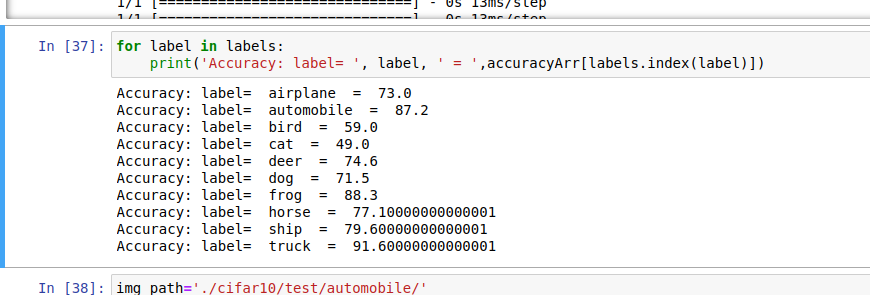

In [84]:
img_path='./cifar10/test/frog/'

In [85]:
images=os.listdir(img_path)

In [86]:
yes=0
no=0
label='automobile'
for image in images:
    img = tf.keras.preprocessing.image.load_img(os.path.join(img_path,image))
    input_arr = tf.keras.preprocessing.image.img_to_array(img)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    if (labels[np.argmax(Loaded_model.predict(input_arr))]==label):
        yes+=1
    else:
        no+=1

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


In [87]:
print('Yes: ',yes)
print('No: ', no)
print('accuracy: ',(yes/(yes+no))*100)

Yes:  4
No:  996
accuracy:  0.4


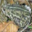

In [88]:
img

In [89]:
input_arr = tf.keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])  # Convert single image to a batch.

In [90]:
labels[np.argmax(Loaded_model.predict(input_arr))]

1/1 [==============================] - 0s 17ms/step


'frog'

In [76]:
#importing and processing input image
import cv2

# os.listdir('./cifar10/test/airplane')

img = cv2.imread('./cifar10/test/airplane/0052.png')
img = np.expand_dims(img/255, 0)
labels[np.argmax(Loaded_model.predict(img))]

# Testing over internet images

In [25]:
internet_path='./fromInternet/'

In [26]:
images=os.listdir(internet_path)
images

['ship.jpg', 'frog.jpg', 'airplane.jpg', 'deer.jpg', 'dog.jpg', 'horse.jpg']

In [27]:
for image in images:
    img = tf.keras.preprocessing.image.load_img(os.path.join(internet_path,image),target_size=(32, 32))
    input_arr = tf.keras.preprocessing.image.img_to_array(img)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    print(image, ' is:', labels[np.argmax(Loaded_model.predict(input_arr))])

1/1 [==============================] - 0s 21ms/step
ship.jpg  is: ship
1/1 [==============================] - 0s 20ms/step
frog.jpg  is: frog
1/1 [==============================] - 0s 18ms/step
airplane.jpg  is: airplane
1/1 [==============================] - 0s 16ms/step
deer.jpg  is: airplane
1/1 [==============================] - 0s 15ms/step
dog.jpg  is: dog
1/1 [==============================] - 0s 15ms/step
horse.jpg  is: horse


In [28]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]